# Exploratory Data Analysis with Pandas Python

In [660]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  # Apply style sheet for plots / add setting
# pd.set_option('max_columns',200) # Expand column to 200 

In [661]:
df = pd.read_csv('../../../Downloads/archive-2/charging_sessions.csv')  # Read data from csv file

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [662]:
df.shape # (Rows, Columns) 114000, 7
df.head(20) 

,session_id,customer_id,station_id,session_start_time,kwh_charged,cost_per_kwh,total_cost
0,S00001,C3806,18,2025-10-04 05:42:00,46.691971,1.851397,86.445363
1,S00002,C4931,98,2025-10-19 16:12:00,39.061716,3.256199,127.192717
2,S00003,C2250,145,2025-09-14 15:18:00,30.280525,2.704520,81.894289
3,S00004,C3790,165,2025-10-06 23:22:00,44.577079,1.851397,82.529859
4,S00005,C4834,68,2025-09-26 09:07:00,37.998209,2.704520,102.766920
5,S00006,C6834,55,2025-09-01 16:53:00,42.520575,3.256199,138.455452
6,S00007,C0967,131,2025-11-02 12:01:00,47.133534,2.704520,127.473593
7,S00008,C5713,33,2025-10-30 12:14:00,20.677966,2.704520,55.923976
8,S00009,C5256,85,2025-09-21 08:58:00,26.960971,2.704520,72.916488
9,S00010,C7412,92,2025-11-05 14:04:00,67.213731,2.704520,181.780888


In [663]:
df.columns

Index(['session_id', 'customer_id', 'station_id', 'session_start_time',
       'kwh_charged', 'cost_per_kwh', 'total_cost'],
      dtype='object')

In [664]:
df.dtypes



session_id             object
customer_id            object
station_id              int64
session_start_time     object
kwh_charged           float64
cost_per_kwh          float64
total_cost            float64
dtype: object

In [665]:
df.describe()

,station_id,kwh_charged,cost_per_kwh,total_cost
count,114000.000000,114000.000000,114000.000000,114000.000000
mean,97.856447,39.125132,2.561615,100.210541
std,48.767888,12.729146,0.506239,38.634723
min,1.000000,13.401015,1.851397,24.810596
25%,62.000000,30.078538,1.851397,71.845002
50%,100.000000,37.934537,2.704520,95.703010
75%,141.000000,48.065057,2.704520,124.789060
max,182.000000,75.995841,3.256199,247.130372


## Step 2: Data Preparation 
- Dropping irrelevant columns and rows 
- Identifying duplicated columns 
- Renaming Columns 
- Feature Creation 

In [666]:
# Only extract relevant columns
df = df[[#'session_id', 
        # customer_id', 
        'station_id', 
        'session_start_time', 'kwh_charged', 'cost_per_kwh', 'total_cost']].copy()

## Or we can use drop method
# df.drop(columns=['session_id', 'customer_id', 'station_id', 'session_start_time'], inplace=True)
df

,station_id,session_start_time,kwh_charged,cost_per_kwh,total_cost
0,18,2025-10-04 05:42:00,46.691971,1.851397,86.445363
1,98,2025-10-19 16:12:00,39.061716,3.256199,127.192717
2,145,2025-09-14 15:18:00,30.280525,2.704520,81.894289
3,165,2025-10-06 23:22:00,44.577079,1.851397,82.529859
4,68,2025-09-26 09:07:00,37.998209,2.704520,102.766920
...,...,...,...,...,...
113995,70,2025-10-24 11:32:00,33.221606,2.704520,89.848502
113996,131,2025-09-04 00:41:00,55.850678,1.851397,103.401763
113997,14,2025-10-29 14:11:00,44.547895,2.704520,120.480680
113998,155,2025-10-22 10:19:00,30.946160,2.704520,83.694513


In [667]:
df.dtypes

station_id              int64
session_start_time     object
kwh_charged           float64
cost_per_kwh          float64
total_cost            float64
dtype: object

In [668]:
df['session_start_time'] = pd.to_datetime(df['session_start_time'])  # Convert from object to datetime format 
#df['session_start_time'] = pd.to_numeric(df['session_start_time'])  # Convert from object to datetime format 


In [669]:
# Rename columns
df = df.rename(columns={'session_start_time':'Start_Time', 'kwh_charged':'KWh_Charged',
                        'cost_per_kwh':'Cost_Per_KWh', 'total_cost':'Total_Cost', 'station_id':'Station_ID'})
df.head()
df2  = df.copy()  # Create a copy of the dataframe


In [670]:
# Identifying missing values
df.isna().sum()  # No missing values

Station_ID      0
Start_Time      0
KWh_Charged     0
Cost_Per_KWh    0
Total_Cost      0
dtype: int64

In [671]:
# Identifying if duplicated 
df = df.loc[~df.duplicated(subset=['Station_ID', 'Start_Time', 'KWh_Charged'])].copy() # No duplicated rows

# df = df.loc[~df.duplicated(subset=['Customer_ID', 'Start_Time', 'KWh_Charged'])].reset_index(drop=True) # Reset index after dropping duplicated rows


## Step 3: Feature Understanding 
Univariate analysis 
- Plotting Feature Distributions 
  - Histogram 
  - KDE 
  - Boxplot 

Present data as a monthly basis


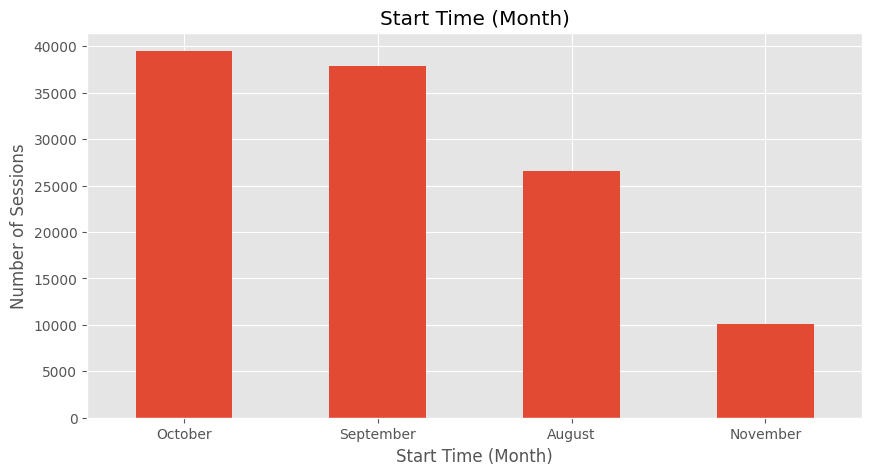

In [672]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])  # Ensure Start_Time is in datetime format

# df['Start_Time'] = df['Start_Time'].dt.month   # Round down to month
# Extract month name instead of number
# df['Month'] = df['Start_Time'].dt.month_name() # # Extract month name instead of number

ax = df['Start_Time'].dt.month_name().value_counts() .head(10)\
.plot(kind='bar', title='Start Time (Month)', figsize=(10,5))
ax.set_xlabel('Start Time (Month)')
ax.set_ylabel('Number of Sessions')

# Make x-axis labels horizontal
plt.xticks(rotation=0)
plt.show()

Note: We can produce histogram for each features 

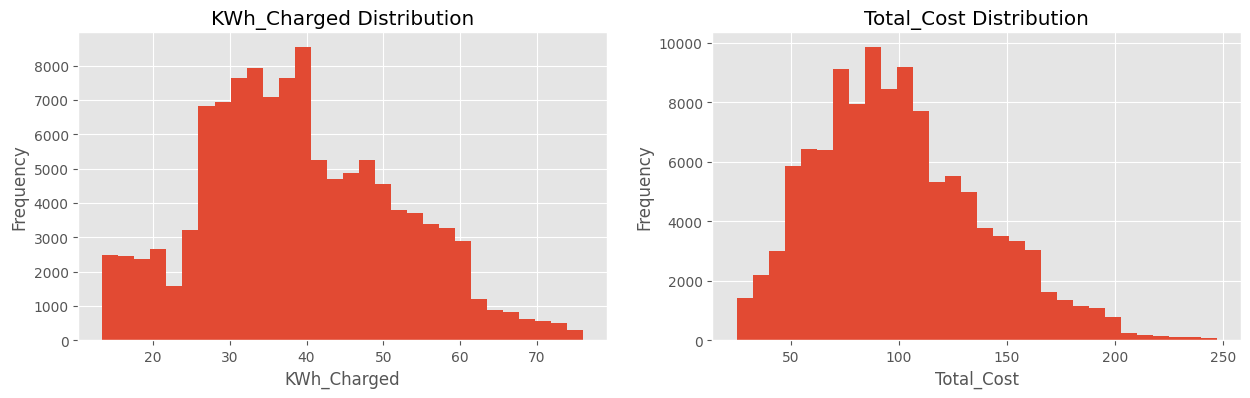

In [673]:
def plot_histograms(df, columns, bins=30):
    plt.figure(figsize=(15, 4))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        df[col].plot(kind='hist', bins=bins, title=f'{col} Distribution')
        plt.xlabel(col)
    plt.show()

# Usage:
plot_histograms(df, ['KWh_Charged', 'Total_Cost'])

# ax = df['KWh_Charged'].plot(kind='hist', bins=30, title='KWh Charged Distribution', figsize=(10,5))
# ax.set_xlabel('KWh Charged')

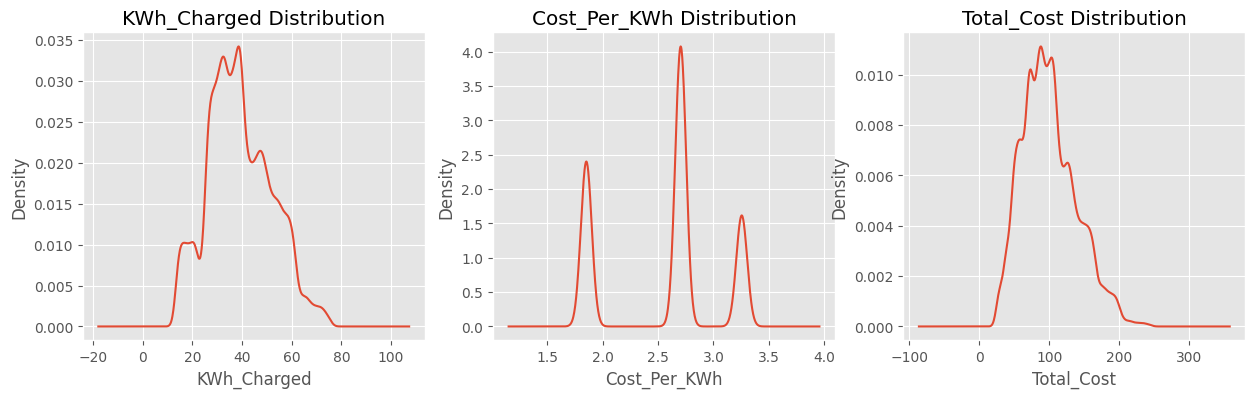

In [674]:
def plot_kde(df, columns):
    plt.figure(figsize=(15, 4))
    for i, col in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        df[col].plot(kind='kde', title=f'{col} Distribution')
        plt.xlabel(col)
    plt.show()

# Usage:
plot_kde(df, ['KWh_Charged', 'Cost_Per_KWh', 'Total_Cost'])


# ax = df['KWh_Charged'].plot(kind='kde', title='KWh Charged Distribution', figsize=(10,5))
# ax.set_xlabel('KWh Charged')

## Step 4: Feature Relationships 
- Scatterplot 
- Heatmap Correlation 
- Pairplot 
- Groupby comparison 

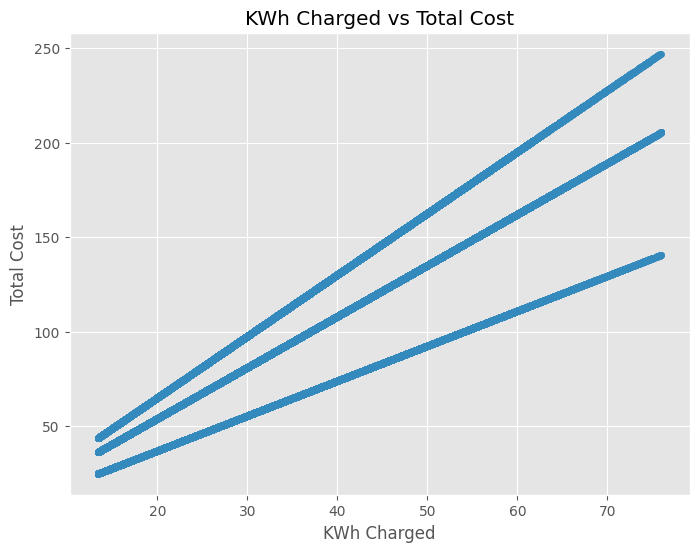

In [675]:
df.plot(kind='scatter', x='KWh_Charged', y='Total_Cost', title='KWh Charged vs Total Cost', figsize=(8,6))
plt.xlabel('KWh Charged')
plt.ylabel('Total Cost')
plt.show()

In [676]:
df['Start_Time'] = df['Start_Time'].dt.month_name()  # Extract month name instead of number

Text(0.5, 1.0, 'KWh Charged vs Total Cost')

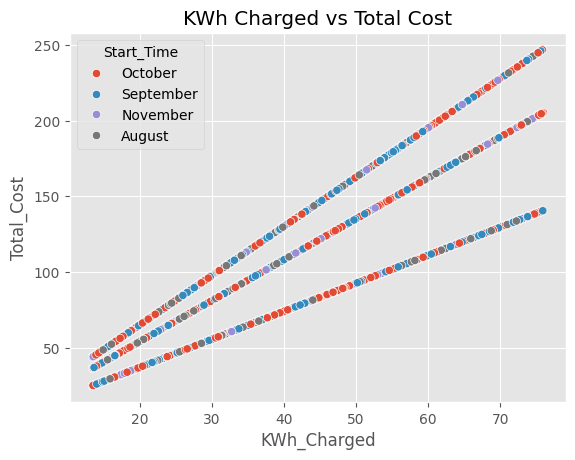

In [677]:
# Seaborn scatterplot now we can colour by month
sns.scatterplot(x='KWh_Charged', y='Total_Cost', hue = 'Start_Time', data=df)
plt.title('KWh Charged vs Total Cost')

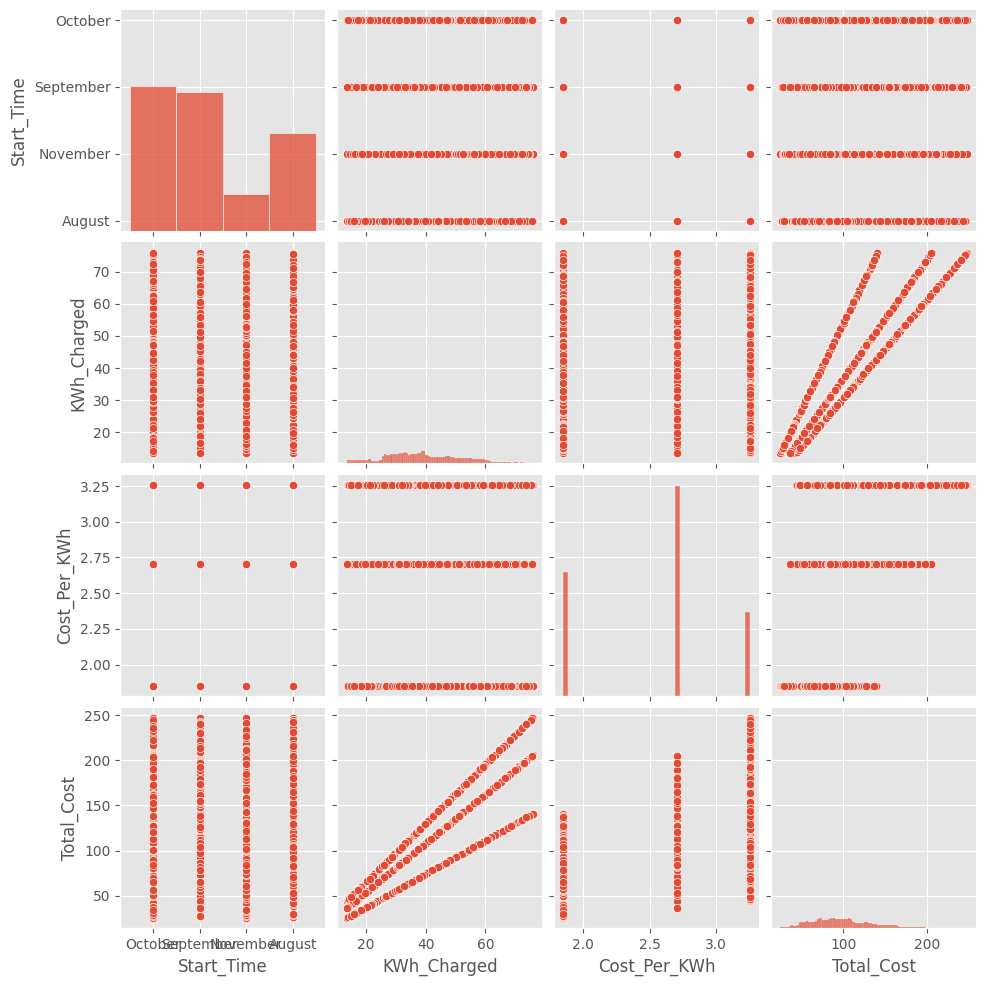

In [678]:
sns.pairplot(df, vars = ['Start_Time', 'KWh_Charged', 'Cost_Per_KWh', 'Total_Cost'])
#Use hue to add another dimension

plt.show()

In [679]:
df_corr = df[['KWh_Charged', 'Cost_Per_KWh', 'Total_Cost']].dropna() .corr()  # Just display these columns

<Axes: >

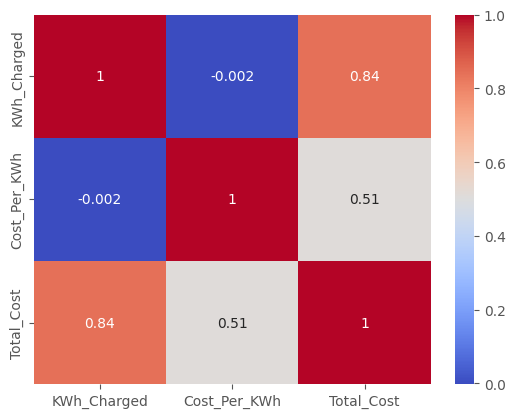

In [680]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

## Ask a Question about the data 
- Question data about the data 

What station id has the most used over the period from August to November?? 
What are the average cost and charged of each of the top 10 stations. 

In [681]:
df['Station_ID'].value_counts().head(20)  # Top 10 most frequent Station_IDs

Station_ID
163    1856
150    1851
27     1825
92     1824
68     1811
36     1811
124    1810
136    1809
157    1806
18     1801
119    1799
61     1798
98     1793
55     1789
122    1788
28     1787
73     1785
14     1782
70     1780
21     1777
Name: count, dtype: int64

In [682]:
#df.query ('Station_ID == "ST12345"')  # Filter rows for a specific Station_ID
df.query('Start_Time == "September"')\
    .groupby('Station_ID')['Start_Time']\
    .agg([ 'count'])\
    .query('count >= 610') 



,count
Station_ID,
18,614
27,620
28,613
60,626
68,618
124,610
150,614
157,611
159,619


In [683]:
# Filter for September
df_sept = df[df['Start_Time'] == "September"]

# Group by Station_ID and aggregate count and mean of Total_Cost
result = df_sept.groupby('Station_ID')\
    .agg(count=('Total_Cost', 'count'),\
    mean_total_cost=('Total_Cost', 'mean'))
    
# Optionally filter for stations with at least 610 sessions
result = result[result['count'] >= 610]

result


,count,mean_total_cost
Station_ID,,
18,614,98.576759
27,620,102.818613
28,613,100.106090
60,626,102.278545
68,618,97.301575
124,610,99.692797
150,614,100.215542
157,611,98.266696
159,619,99.939003


Interestingly though August does not have the most number of sessions, It has the most frequent monthly used per station of 451 with highest power used and also highest total costs

In [684]:

monthly_station_stats = (df.groupby(['Start_Time', 'Station_ID'])
        .agg(session_count=('Station_ID', 'count'),
        mean_power_used=('KWh_Charged', 'mean'),
        mean_total_cost=('Total_Cost', 'mean'))
    .reset_index()
)

# # For each month, get the top 10 stations by session_count
top10_per_month = (
    monthly_station_stats
    .sort_values(['Start_Time', 'session_count'], ascending=[True, False])
    .groupby('Start_Time')
    .head(10)
)

print(top10_per_month)

    Start_Time  Station_ID  session_count  mean_power_used  mean_total_cost
18      August          64            451        39.851736       102.494229
47      August         136            450        38.802746       101.601127
31      August          98            444        38.878323       101.148381
27      August          88            441        38.715719        97.827415
40      August         119            440        38.959863       100.488198
59      August         163            440        38.932138        99.135097
43      August         126            436        39.021434       100.116409
7       August          28            433        39.600716       102.062171
15      August          61            433        39.111286       100.189493
39      August         118            429        38.408436        97.980573
87    November          73            176        37.663727        97.307516
128   November         176            176        38.711211        99.873690
72    Novemb

### Peak Usage Times

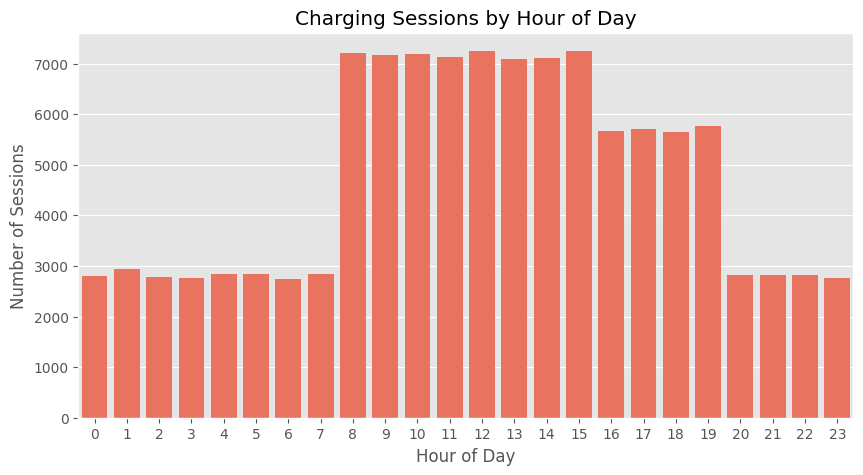

In [ ]:
df['hour'] = df2['Start_Time'].dt.hour

hourly_usage = df.groupby('hour')['Station_ID'].count()

plt.figure(figsize=(10,5))
sns.barplot(x=hourly_usage.index, y=hourly_usage.values, color="tomato")
plt.title("Charging Sessions by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sessions")
plt.show()


## Revenue Analysis 

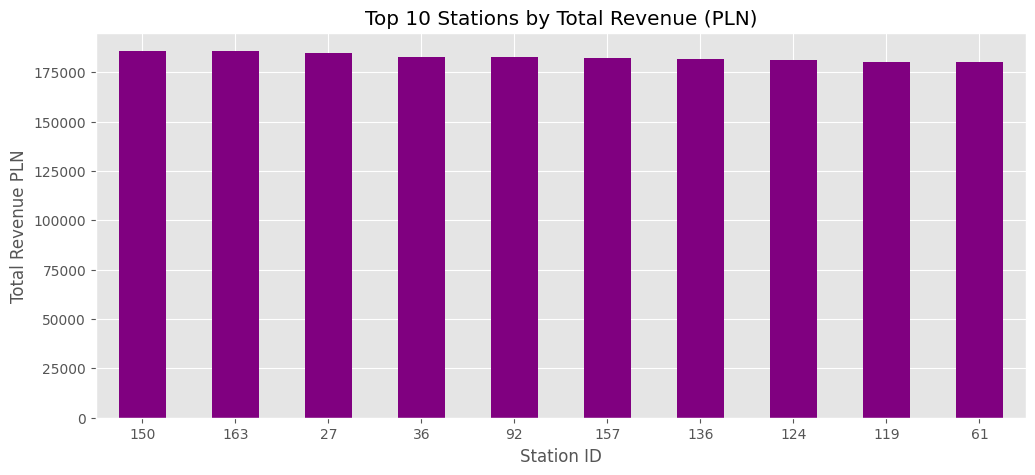

In [698]:
station_revenue = df.groupby('Station_ID')['Total_Cost'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,5))
station_revenue.head(10).plot(kind='bar', color="purple")
plt.title("Top 10 Stations by Total Revenue (PLN)")
plt.xlabel("Station ID")
plt.ylabel("Total Revenue PLN")
plt.xticks(rotation=0)
plt.show()


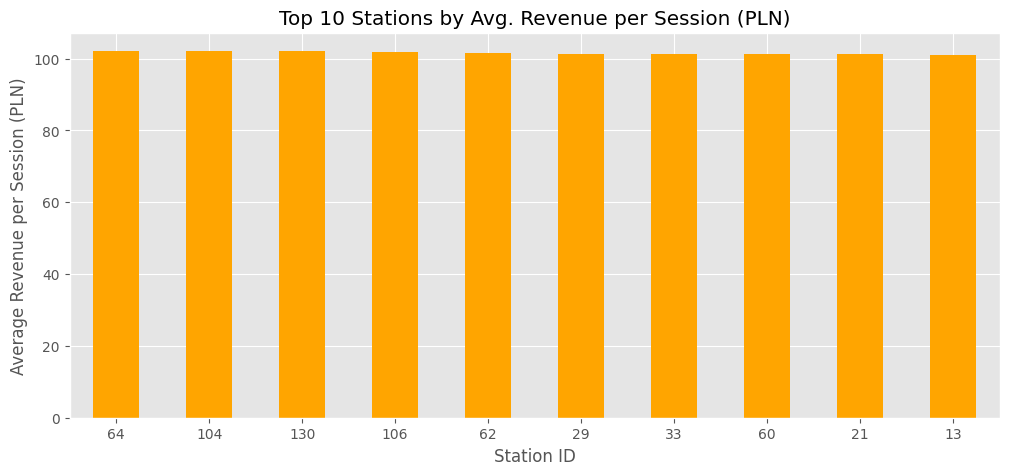

In [699]:
avg_revenue = df.groupby('Station_ID')['Total_Cost'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
avg_revenue.head(10).plot(kind='bar', color="orange")
plt.title("Top 10 Stations by Avg. Revenue per Session (PLN)")
plt.xlabel("Station ID")
plt.ylabel("Average Revenue per Session (PLN)")
plt.xticks(rotation=0)
plt.show()


In [700]:
summary = df.groupby('Station_ID')['Total_Cost'].agg(
    total_revenue='sum',
    avg_revenue='mean',
    session_count='count'
).sort_values(by='total_revenue', ascending=False)

summary.head(10)


,total_revenue,avg_revenue,session_count
Station_ID,,,
150,185720.478472,100.335213,1851
163,185556.661696,99.976650,1856
27,184504.419637,101.098312,1825
36,182763.902670,100.918776,1811
92,182691.558690,100.159846,1824
157,182122.029010,100.842762,1806
136,181777.110452,100.484859,1809
124,181142.906218,100.078954,1810
119,180224.996129,100.180654,1799
